# RE-ANALYSE PUBLICLY AVAILABLE DATA BY RIEMONDY ET AL IN ORDER TO CLASSIFY LFSMB DATASET

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import bbknn
import scrublet as scr
from matplotlib import rcParams
import matplotlib
from SCCAF import SCCAF_assessment, plot_roc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white',  dpi_save=600)

In [3]:
results_file = '/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/RiemondyEtal2021_adata.h5ad'  # the file that will store the analysis results

## READ IN THE DATA AND CHECK AT QC METRICES

In [4]:
adata = sc.read('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/RiemondyEtal2021/GSE155446_human_raw_counts.csv.gz', ext='csv', first_column_names=True, cache=True).transpose()

... reading from cache file cache/omics-groups-OE0540-internal-projects-przybilm-medulloblastoma-RiemondyEtal2021-GSE155446_human_raw_counts.h5ad


In [5]:
adata.obs

Empty DataFrame
Columns: []
Index: [753_AAACGAAGTCTTGGTA, 753_AAACGCTTCCATGATG, 753_AAACGCTTCGAGTGGA, 753_AAAGAACCAAATGGTA, 753_AAAGAACTCATTCATC, 753_AAAGGGCCAGTAGTTC, 753_AAAGGTACAACGCATT, 753_AAAGGTACACTGGAAG, 753_AAAGTCCCAAGGCCTC, 753_AAAGTGATCATCTATC, 753_AAAGTGATCTAGAGCT, 753_AACAAAGCAAGAGAGA, 753_AACAAGAAGACCAGAC, 753_AACAAGAAGTGGTTAA, 753_AACAAGATCGACCATA, 753_AACACACAGGCCTGAA, 753_AACACACGTCGCATTA, 753_AACCAACAGGCATCGA, 753_AACCACAAGCTAAATG, 753_AACCACACATGACGTT, 753_AACCATGTCTCACTCG, 753_AACCCAACAAGCGGAT, 753_AACCCAAGTAACAGGC, 753_AACCTGATCTTTCCGG, 753_AACGAAAAGCAACTCT, 753_AACGAAAGTCACCGCA, 753_AACGAAAGTTGTGGCC, 753_AACGTCAGTAACGTTC, 753_AAGACAAGTCTTTCAT, 753_AAGATAGCATTGACTG, 753_AAGATAGTCATTCTTG, 753_AAGCATCCACTATGTG, 753_AAGCATCTCATGGCCG, 753_AAGCCATTCATTCGTT, 753_AAGCGTTTCCCAGGAC, 753_AAGGAATCAAATGAAC, 753_AAGGTAATCTCGGCTT, 753_AAGTACCCATAACAGA, 753_AAGTACCGTCCATAGT, 753_AAGTCGTTCTCCAATT, 753_AAGTGAATCCGATGTA, 753_AAGTTCGAGTCGGCCT, 753_AAGTTCGCATAGACTC, 753_AAGTTCGGTTGGGATG, 753_AATAGAGCAGCTTCCT, 753_AATCGACCACTAACCA, 753_AATCGACTCCTGTAGA, 753_AATCGTGTCCGTCACT, 753_AATGAAGGTCCACATA, 753_AATGACCTCCCGAGGT, 753_AATGACCTCTCATGCC, 753_AATGGAAAGGTGTGAC, 753_AATGGAACAGTCCCGA, 753_AATGGAAGTGCAGATG, 753_AATGGCTTCTATCGCC, 753_AATTCCTAGATCCCAT, 753_AATTTCCTCCTATTTG, 753_ACAACCAAGAGAGGGC, 753_ACAAGCTAGTGACACG, 753_ACAAGCTCACGAGGAT, 753_ACAAGCTCATGGCACC, 753_ACACAGTCATCACGGC, 753_ACACTGAGTCATTGCA, 753_ACAGAAAAGCTGCCTG, 753_ACAGCCGAGTAGGATT, 753_ACAGCCGGTGCCCACA, 753_ACAGCCGTCAATCCAG, 753_ACAGGGAAGAAGGGAT, 753_ACAGGGAGTCATCAGT, 753_ACATCCCAGGGATGTC, 753_ACATCGAGTCTAGTGT, 753_ACATCGAGTTCTGAGT, 753_ACATTTCGTTGCATAC, 753_ACATTTCTCTCGGTCT, 753_ACATTTCTCTTGCGCT, 753_ACCAAACTCGGCCTTT, 753_ACCAACACACTAGAGG, 753_ACCAACACACTAGGCC, 753_ACCAACATCTCGCTCA, 753_ACCACAATCGGACAAG, 753_ACCATTTAGTACGTCT, 753_ACCATTTTCCATTTCA, 753_ACCCAAAAGGATTACA, 753_ACCCAAATCGGCTTGG, 753_ACCCTCACAGTTGTCA, 753_ACCCTCACATGAGGGT, 753_ACCCTCAGTTGTTTGG, 753_ACCCTCATCTGACAGT, 753_ACCCTTGCATGACCCG, 753_ACCTGAAAGCAATTCC, 753_ACCTGTCCAGGCGATA, 753_ACCTGTCCATTATGCG, 753_ACGATCACAGTATACC, 753_ACGCACGTCTTTGCGC, 753_ACGGAAGTCGCCTATC, 753_ACGGTCGAGAATCGCG, 753_ACGTAACGTCGCCACA, 753_ACGTACACACAAGTTC, 753_ACGTTCCAGTAACGAT, 753_ACGTTCCGTAGTGCGA, ...]

[39946 rows x 0 columns]

In [6]:
anno = pd.read_csv('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/RiemondyEtal2021/GSE155446_human_cell_metadata.csv',header=0)
anno

cell subgroup  UPN additional_info  \
0        753_AAACGAAGTCTTGGTA      GP4  753             NaN   
1        753_AAACGCTTCCATGATG      GP4  753             NaN   
2        753_AAACGCTTCGAGTGGA      GP4  753             NaN   
3        753_AAAGAACCAAATGGTA      GP4  753             NaN   
4        753_AAAGAACTCATTCATC      GP4  753             NaN   
...                       ...      ...  ...             ...   
39941  966-2_TTTGGAGGTATGAGAT      GP4  966      recurrance   
39942  966-2_TTTGGTTCATACAGCT      GP4  966      recurrance   
39943  966-2_TTTGGTTGTCCGTACG      GP4  966      recurrance   
39944  966-2_TTTGTTGTCGCTGACG      GP4  966      recurrance   
39945  966-2_TTTGTTGTCGTCGATA      GP4  966      recurrance   

                     fastq_id coarse_cell_type tumor_subpopulation  \
0      Foreman_753_03142019_1        malignant              GP4-B1   
1      Foreman_753_03142019_1        malignant              GP4-C1   
2      Foreman_753_03142019_1        malignant              GP4-B2   
3      Foreman_753_03142019_1        malignant              GP4-A2   
4      Foreman_753_03142019_1        malignant              GP4-C1   
...                       ...              ...                 ...   
39941                   966_2        malignant              GP4-C1   
39942                   966_2        malignant              GP4-C1   
39943                   966_2        malignant              GP4-B1   
39944                   966_2        malignant              GP4-B1   
39945                   966_2        malignant              GP4-C1   

        geo_sample_id  
0                 753  
1                 753  
2                 753  
3                 753  
4                 753  
...               ...  
39941  966-recurrence  
39942  966-recurrence  
39943  966-recurrence  
39944  966-recurrence  
39945  966-recurrence  

[39946 rows x 8 columns]

In [7]:
adata.obs = anno
adata.obs

cell subgroup  UPN additional_info  \
0        753_AAACGAAGTCTTGGTA      GP4  753             NaN   
1        753_AAACGCTTCCATGATG      GP4  753             NaN   
2        753_AAACGCTTCGAGTGGA      GP4  753             NaN   
3        753_AAAGAACCAAATGGTA      GP4  753             NaN   
4        753_AAAGAACTCATTCATC      GP4  753             NaN   
...                       ...      ...  ...             ...   
39941  966-2_TTTGGAGGTATGAGAT      GP4  966      recurrance   
39942  966-2_TTTGGTTCATACAGCT      GP4  966      recurrance   
39943  966-2_TTTGGTTGTCCGTACG      GP4  966      recurrance   
39944  966-2_TTTGTTGTCGCTGACG      GP4  966      recurrance   
39945  966-2_TTTGTTGTCGTCGATA      GP4  966      recurrance   

                     fastq_id coarse_cell_type tumor_subpopulation  \
0      Foreman_753_03142019_1        malignant              GP4-B1   
1      Foreman_753_03142019_1        malignant              GP4-C1   
2      Foreman_753_03142019_1        malignant              GP4-B2   
3      Foreman_753_03142019_1        malignant              GP4-A2   
4      Foreman_753_03142019_1        malignant              GP4-C1   
...                       ...              ...                 ...   
39941                   966_2        malignant              GP4-C1   
39942                   966_2        malignant              GP4-C1   
39943                   966_2        malignant              GP4-B1   
39944                   966_2        malignant              GP4-B1   
39945                   966_2        malignant              GP4-C1   

        geo_sample_id  
0                 753  
1                 753  
2                 753  
3                 753  
4                 753  
...               ...  
39941  966-recurrence  
39942  966-recurrence  
39943  966-recurrence  
39944  966-recurrence  
39945  966-recurrence  

[39946 rows x 8 columns]

normalizing counts per cell
    finished (0:00:49)


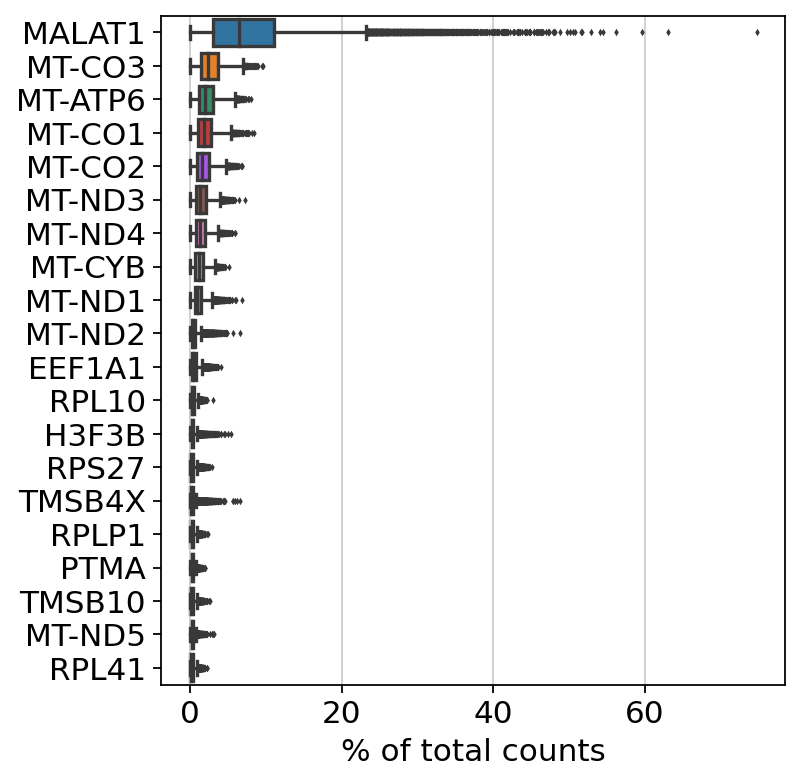

In [8]:
# preprocessing
sc.pl.highest_expr_genes(adata, n_top=20)

In [9]:
# basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


filtered out 801 genes that are detected in less than 3 cells


In [10]:
# calculate some quality metrics as for instance mitochondrial percentage
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)

# and for ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(('RPS','RPL'))  # annotate the group of ribosomal genes as 'ribo'
sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo'], percent_top=None, inplace=True)

/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'subgroup' as categorical
... storing 'additional_info' as categorical
... storing 'fastq_id' as categorical
... storing 'coarse_cell_type' as categorical
... storing 'tumor_subpopulation' as categorical
... storing 'geo_sample_id' as categorical


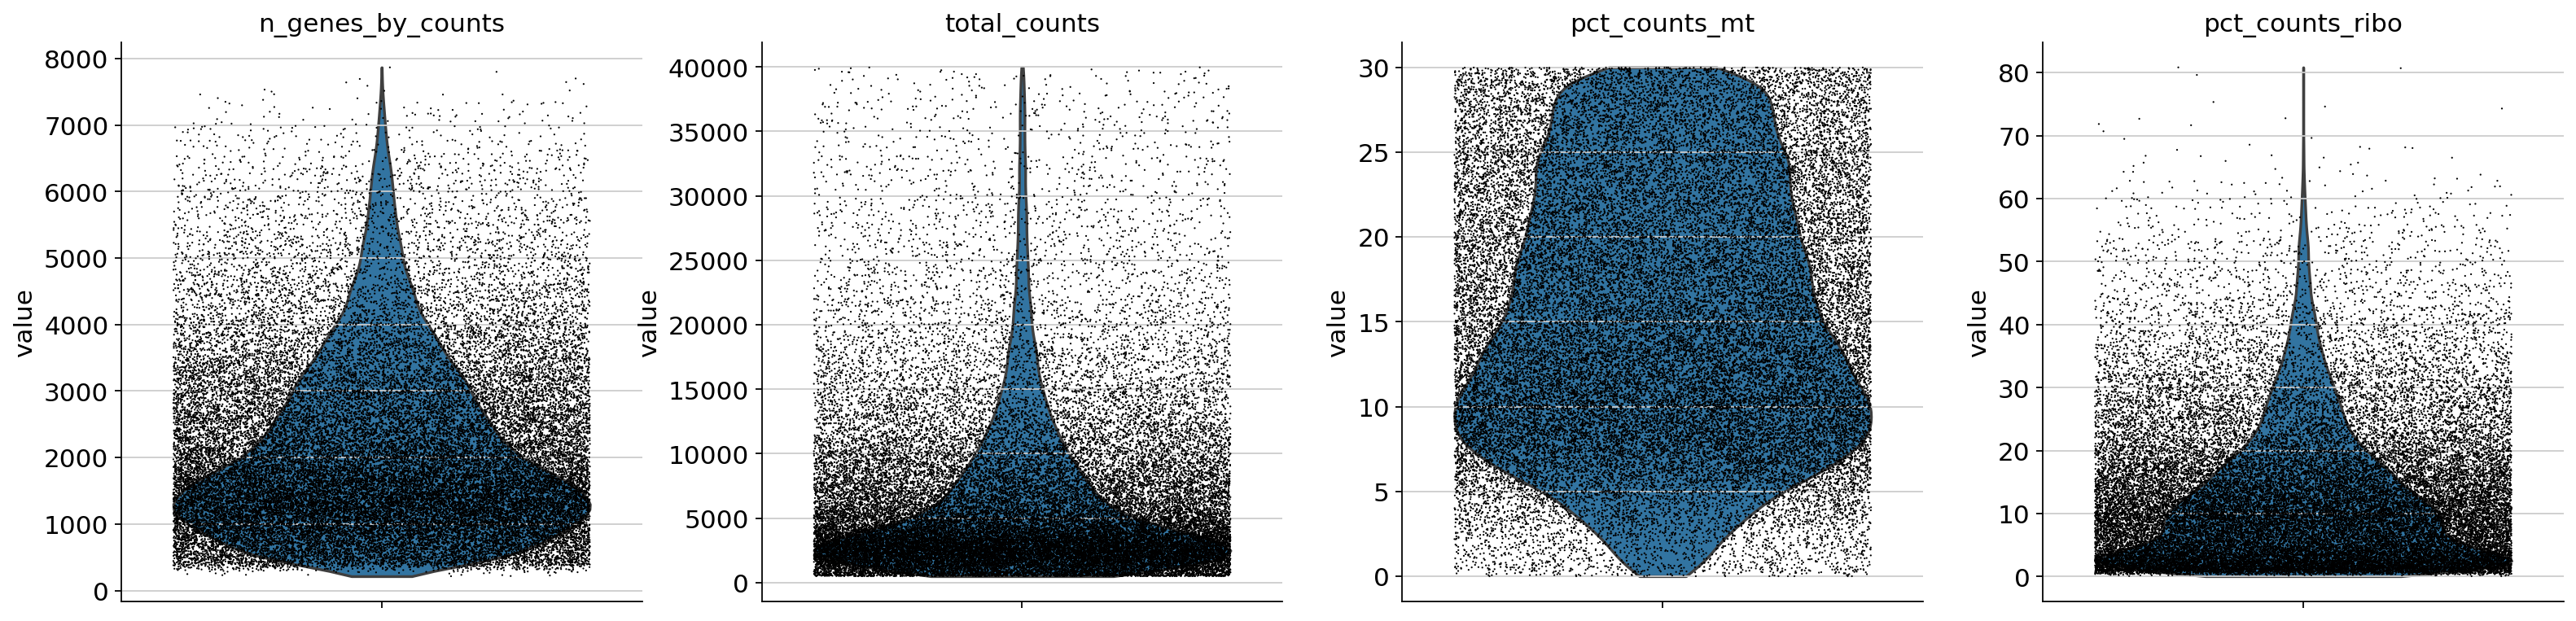

In [11]:
# visualize some QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

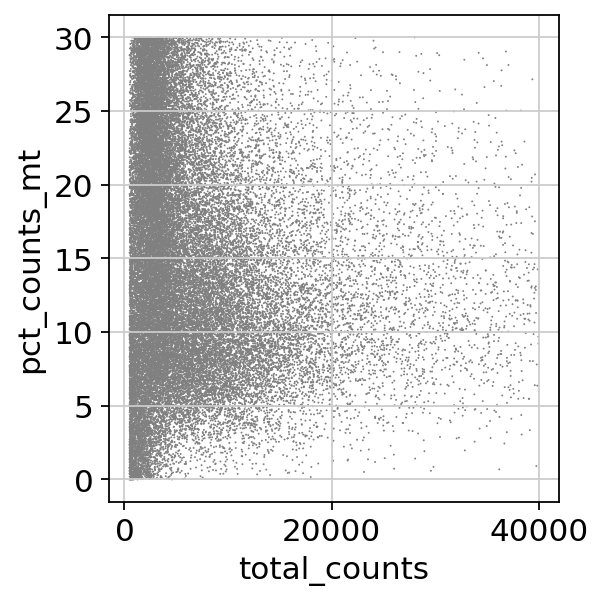

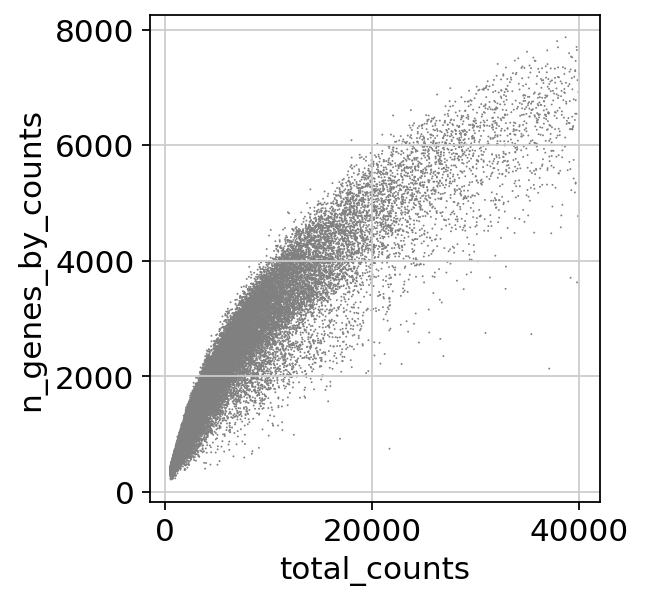

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [14]:
mean_counts = adata.obs['total_counts'].mean()
mean_genes = adata.obs['n_genes'].mean()
print(mean_counts)
print(mean_genes)

6773.7744140625
2155.8364291793923


In [15]:
adata.obs

cell subgroup  UPN additional_info  \
0        753_AAACGAAGTCTTGGTA      GP4  753             nan   
1        753_AAACGCTTCCATGATG      GP4  753             nan   
2        753_AAACGCTTCGAGTGGA      GP4  753             nan   
3        753_AAAGAACCAAATGGTA      GP4  753             nan   
4        753_AAAGAACTCATTCATC      GP4  753             nan   
...                       ...      ...  ...             ...   
39941  966-2_TTTGGAGGTATGAGAT      GP4  966      recurrance   
39942  966-2_TTTGGTTCATACAGCT      GP4  966      recurrance   
39943  966-2_TTTGGTTGTCCGTACG      GP4  966      recurrance   
39944  966-2_TTTGTTGTCGCTGACG      GP4  966      recurrance   
39945  966-2_TTTGTTGTCGTCGATA      GP4  966      recurrance   

                     fastq_id coarse_cell_type tumor_subpopulation  \
0      Foreman_753_03142019_1        malignant              GP4-B1   
1      Foreman_753_03142019_1        malignant              GP4-C1   
2      Foreman_753_03142019_1        malignant              GP4-B2   
3      Foreman_753_03142019_1        malignant              GP4-A2   
4      Foreman_753_03142019_1        malignant              GP4-C1   
...                       ...              ...                 ...   
39941                   966_2        malignant              GP4-C1   
39942                   966_2        malignant              GP4-C1   
39943                   966_2        malignant              GP4-B1   
39944                   966_2        malignant              GP4-B1   
39945                   966_2        malignant              GP4-C1   

        geo_sample_id  n_genes  n_genes_by_counts  log1p_n_genes_by_counts  \
0                 753     2668               2668                 7.889459   
1                 753      417                417                 6.035481   
2                 753     1322               1322                 7.187657   
3                 753     1303               1303                 7.173192   
4                 753      708                708                 6.563856   
...               ...      ...                ...                      ...   
39941  966-recurrence     1198               1198                 7.089243   
39942  966-recurrence      835                835                 6.728629   
39943  966-recurrence     1671               1671                 7.421776   
39944  966-recurrence     1911               1911                 7.555905   
39945  966-recurrence      602                602                 6.401917   

       total_counts  log1p_total_counts  total_counts_mt  \
0            7242.0            8.887791           1520.0   
1             535.0            6.284134             19.0   
2            2983.0            8.001020            387.0   
3            2536.0            7.838737            573.0   
4             940.0            6.846943              6.0   
...             ...                 ...              ...   
39941        3010.0            8.010028            838.0   
39942        1439.0            7.272398            130.0   
39943        3430.0            8.140607            316.0   
39944        3891.0            8.266679            364.0   
39945         991.0            6.899723             86.0   

       log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
0                   7.327123      20.988678              873.0   
1                   2.995732       3.551402               12.0   
2                   5.961005      12.973517              716.0   
3                   6.352629      22.594637              134.0   
4                   1.945910       0.638298               14.0   
...                      ...            ...                ...   
39941               6.732211      27.840530               74.0   
39942               4.875197       9.034052               11.0   
39943               5.758902       9.212828              292.0   
39944               5.899898       9.354921              235.0   
39945               4.465908       8.678103

## PERFORM NORMALIZATION AND PCA

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [17]:
sc.pp.log1p(adata)

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:21)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


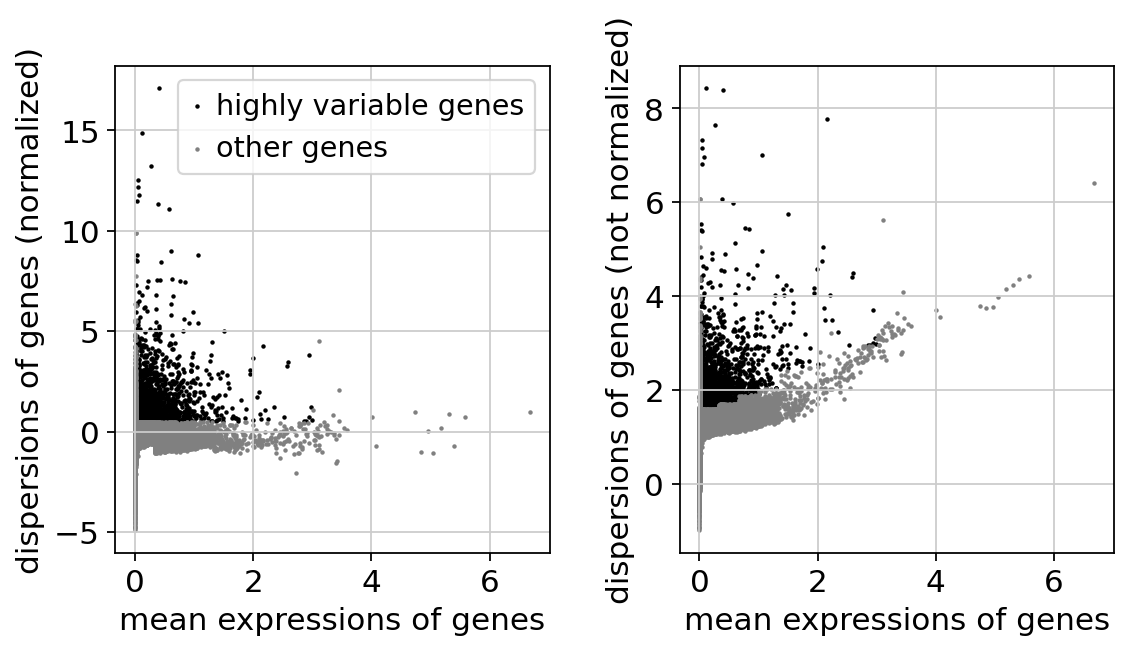

In [19]:
sc.pl.highly_variable_genes(adata)

In [20]:
# set the raw attribute of anndata
adata.raw = adata

In [21]:
adata = adata[:, adata.var.highly_variable]

/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/przybilm/.local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [22]:
# regress out effects of total counts per cell and the percentage of mitochondrial genes
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

regressing out ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']


/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished (0:03:10)


In [23]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)


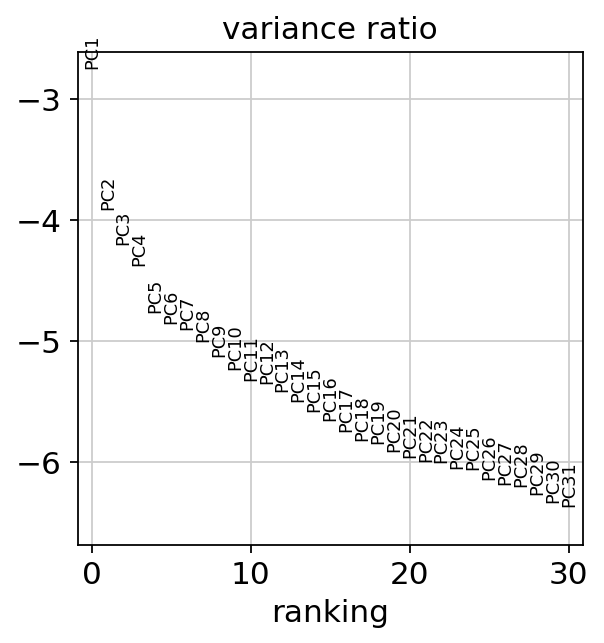

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
adata.obs

cell subgroup  UPN additional_info  \
0        753_AAACGAAGTCTTGGTA      GP4  753             nan   
1        753_AAACGCTTCCATGATG      GP4  753             nan   
2        753_AAACGCTTCGAGTGGA      GP4  753             nan   
3        753_AAAGAACCAAATGGTA      GP4  753             nan   
4        753_AAAGAACTCATTCATC      GP4  753             nan   
...                       ...      ...  ...             ...   
39941  966-2_TTTGGAGGTATGAGAT      GP4  966      recurrance   
39942  966-2_TTTGGTTCATACAGCT      GP4  966      recurrance   
39943  966-2_TTTGGTTGTCCGTACG      GP4  966      recurrance   
39944  966-2_TTTGTTGTCGCTGACG      GP4  966      recurrance   
39945  966-2_TTTGTTGTCGTCGATA      GP4  966      recurrance   

                     fastq_id coarse_cell_type tumor_subpopulation  \
0      Foreman_753_03142019_1        malignant              GP4-B1   
1      Foreman_753_03142019_1        malignant              GP4-C1   
2      Foreman_753_03142019_1        malignant              GP4-B2   
3      Foreman_753_03142019_1        malignant              GP4-A2   
4      Foreman_753_03142019_1        malignant              GP4-C1   
...                       ...              ...                 ...   
39941                   966_2        malignant              GP4-C1   
39942                   966_2        malignant              GP4-C1   
39943                   966_2        malignant              GP4-B1   
39944                   966_2        malignant              GP4-B1   
39945                   966_2        malignant              GP4-C1   

        geo_sample_id  n_genes  n_genes_by_counts  log1p_n_genes_by_counts  \
0                 753     2668               2668                 7.889459   
1                 753      417                417                 6.035481   
2                 753     1322               1322                 7.187657   
3                 753     1303               1303                 7.173192   
4                 753      708                708                 6.563856   
...               ...      ...                ...                      ...   
39941  966-recurrence     1198               1198                 7.089243   
39942  966-recurrence      835                835                 6.728629   
39943  966-recurrence     1671               1671                 7.421776   
39944  966-recurrence     1911               1911                 7.555905   
39945  966-recurrence      602                602                 6.401917   

       total_counts  log1p_total_counts  total_counts_mt  \
0            7242.0            8.887791           1520.0   
1             535.0            6.284134             19.0   
2            2983.0            8.001020            387.0   
3            2536.0            7.838737            573.0   
4             940.0            6.846943              6.0   
...             ...                 ...              ...   
39941        3010.0            8.010028            838.0   
39942        1439.0            7.272398            130.0   
39943        3430.0            8.140607            316.0   
39944        3891.0            8.266679            364.0   
39945         991.0            6.899723             86.0   

       log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
0                   7.327123      20.988678              873.0   
1                   2.995732       3.551402               12.0   
2                   5.961005      12.973517              716.0   
3                   6.352629      22.594637              134.0   
4                   1.945910       0.638298               14.0   
...                      ...            ...                ...   
39941               6.732211      27.840530               74.0   
39942               4.875197       9.034052               11.0   
39943               5.758902       9.212828              292.0   
39944               5.899898       9.354921              235.0   
39945               4.465908       8.678103

In [27]:
# compute nearest neighbors, UMAP and clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata,
            n_components=2,
            min_dist=0.1,  # Scanpy default = 0.05
            spread=1.0,  # Scanpy default = 1.0

            # For some reason cannot access neighbors key slot, thus we
            # must keep uns['neighbors'] until we have run this.
            # neighbors_key='neighbors__{}'.format(plt__label),
               copy=False,
            random_state=0
        )
sc.tl.leiden(adata, resolution= 1.0)

computing neighbors
    using 'X_pca' with n_pcs = 20


/home/przybilm/.local/lib/python3.7/site-packages/numba/core/typed_passes.py:332: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:52)
running Leiden clustering
    finished: found 37 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:10)


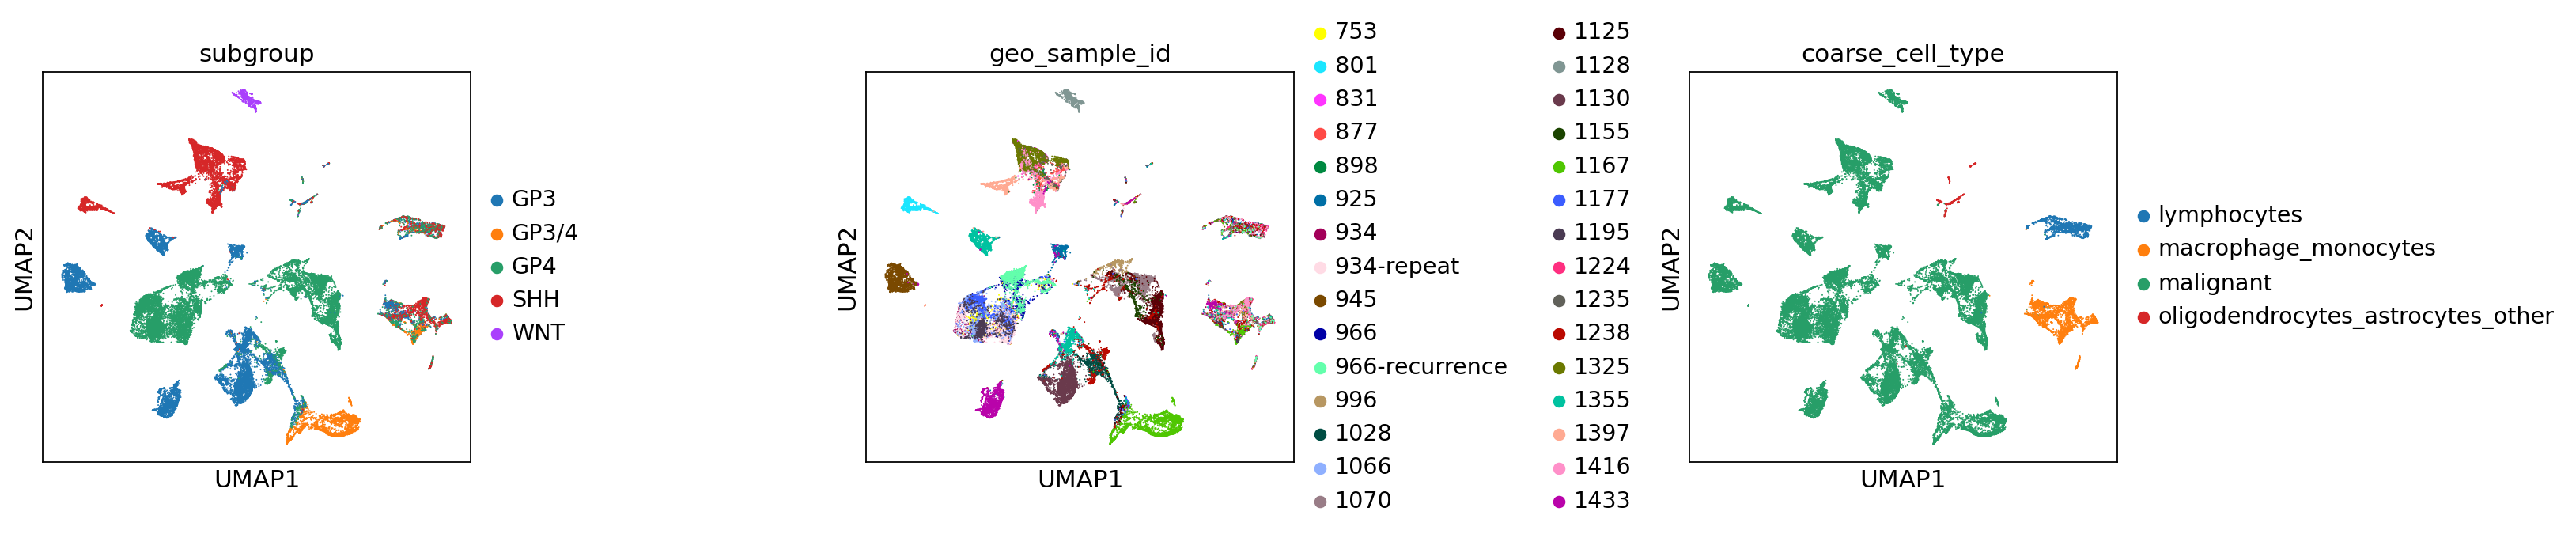

In [29]:
sc.pl.umap(adata, color=["subgroup", 'geo_sample_id', "coarse_cell_type"], wspace = 0.75, save = "RiemondyEtal_UMAP.pdf")

In [30]:
adata.write(results_file)

/home/przybilm/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [ ]:
adata = sc.read(results_file)

In [ ]:
adata.obs

In [ ]:
# find marker genes for each cluster using the Wilcoxon rank sum test
sc.tl.rank_genes_groups(adata, 'coarse_cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save = "RiemondyEtal_Celltypes.pdf")

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcoxon_df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', "scores", 'logfoldchanges', "pvals", 'pvals_adj']})

In [ ]:
# write DEG to file
wilcoxon_df.to_csv("/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/Riemondy_Coarse_Celltypes_DEG_wilcoxon.csv")